
## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:



In [52]:
# Your code here - remember to use markdown cells for comments as well!
# Importing all the packages
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [53]:
# Looking for the data folder content in directory
!ls data

bom.movie_gross.csv
im.db
rt.movie_info.tsv
rt.reviews.tsv
tmdb.movies.csv
tn.movie_budgets.csv


In [54]:
# Reading all the data files through pandas
bom_mov = pd.read_csv("data/bom.movie_gross.csv")
rt = pd.read_csv("data/rt.movie_info.tsv", sep='\t')
rt_rev = pd.read_table("data/rt.reviews.tsv", encoding= 'latin1')
tmdb = pd.read_csv("data/tmdb.movies.csv")
tn = pd.read_csv("data/tn.movie_budgets.csv")
tn_copy = tn.copy()

conn = sqlite3.connect("Data/im.db")
imdb = pd.read_sql("""
SELECT *
  FROM sqlite_master 
 WHERE type = 'table';
""", conn)

imdb_principals = pd.read_sql("SELECT * FROM principals", conn)
imdb_persons = pd.read_sql("SELECT * FROM persons", conn)
imdb_movie_akas = pd.read_sql("SELECT * FROM movie_akas", conn)
imdb_movie_ratings = pd.read_sql("SELECT * FROM movie_ratings", conn)
imdb_movie_basics = pd.read_sql("SELECT * FROM movie_basics", conn)

In [55]:
# Merging the "tmdb" and "bom_mov" data as the variable fm
fm = pd.merge(tmdb, bom_mov, how = 'inner', on = 'title').copy()
# Dropping any null values in the "domestic_gross column"
fm['domestic_gross'].dropna(axis = 'index', how = 'any')
fm.dropna(subset = ['domestic_gross'], inplace=True)
# Filling the "foreign_gross" column null values with '0'
fm['foreign_gross'].fillna(0, inplace=True)
# Changing the "foreign_gross" column into integers
fm['foreign_gross'] = pd.to_numeric(fm['foreign_gross'], errors='coerce')

In [56]:
# Adding the "domestic_gross" and "foreign_gross" to make a column called "worldwide_gross"
fm['worldwide_gross'] = fm['domestic_gross'] + fm['foreign_gross']

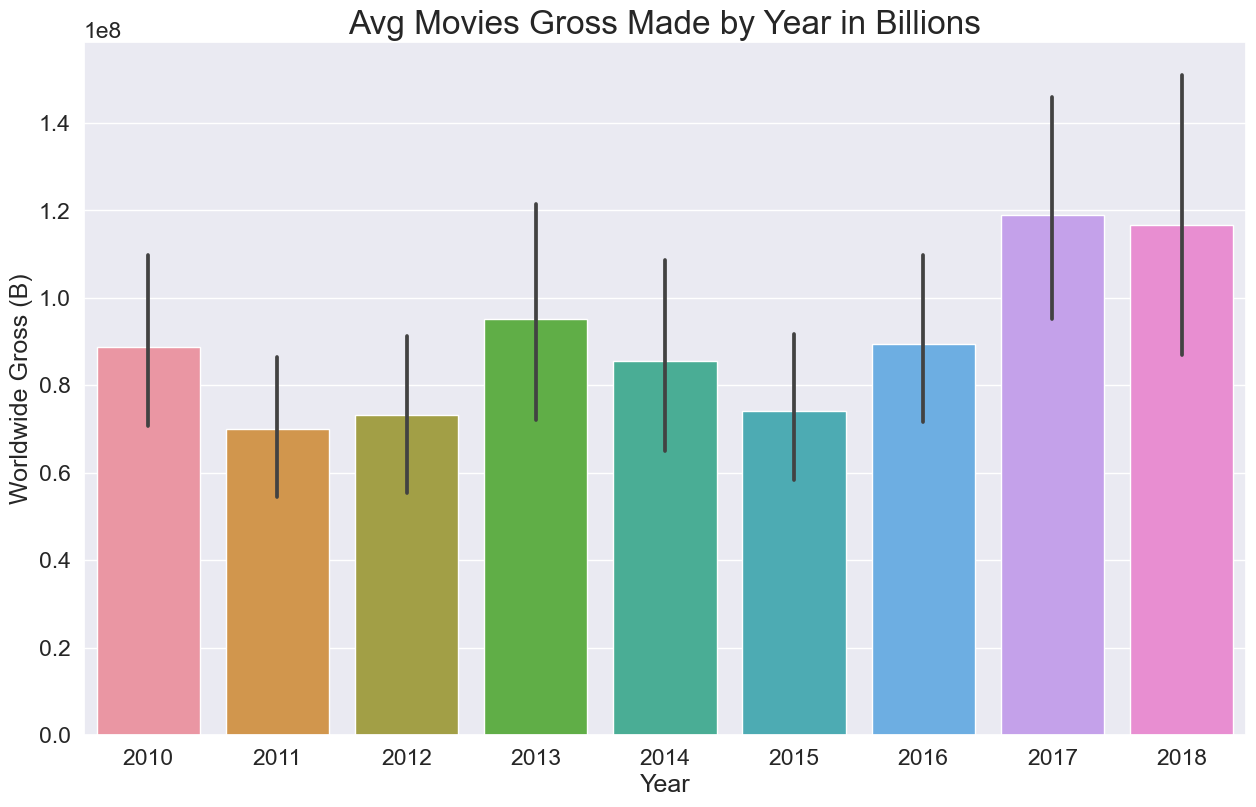

In [57]:
# A Seaborn boxplot comparing each year to the average worldwide gross
fig, ax = plt.subplots(figsize=(15,9))
sns.set(font_scale=2.0)
sns.set_palette("rocket")
sns.barplot(x = fm['year'], y = fm['worldwide_gross'], ax=ax);

ax.set_xlabel("Year")
ax.set_ylabel("Worldwide Gross (B)")
ax.set_title("Avg Movies Gross Made by Year in Billions")

plt.show()

In [58]:
# Creating a subset dataframe called "subset_60p" from the "fm" dataframe that only includes rows where the "popularity" columnn is less than 60
subset_60p = fm.loc[fm['popularity'] < 60]
# Creating another dataframe called "lang_bar_df" from the "subset_60p" that gets the top 5 most popular languages for movies 
lang_bar_df = subset_60p.groupby('original_language').median().sort_values(by = 'popularity', ascending = False).reset_index().head()

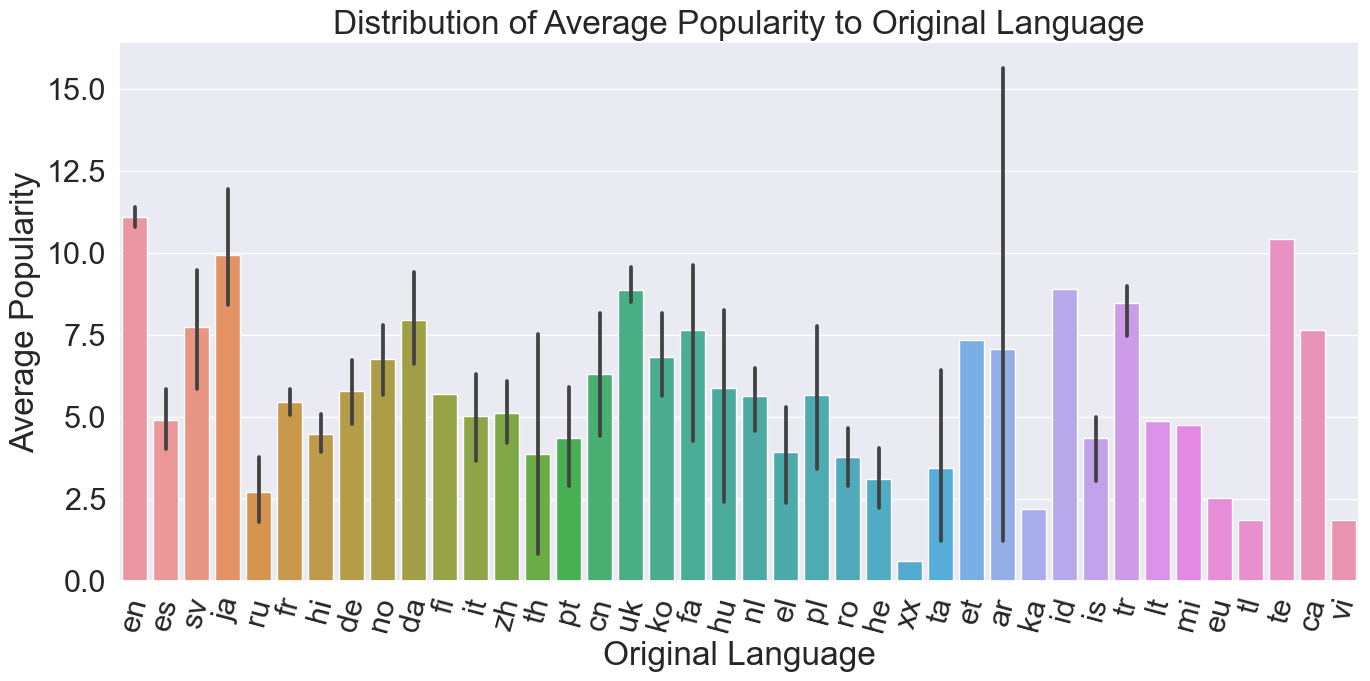

In [59]:
# A Seaborn barplot comparing the average popularity with each language in the "subset_60p" dataframe
fig, ax = plt.subplots(figsize=(16,7))
sns.barplot(x = subset_60p['original_language'], y = subset_60p['popularity'])
fig.subplots_adjust(hspace=0.125, wspace=0.125)
ax.tick_params(axis='x', rotation=75)
ax.set_xlabel('Original Language')
ax.set_ylabel('Average Popularity')
ax.set_title('Distribution of Average Popularity to Original Language');

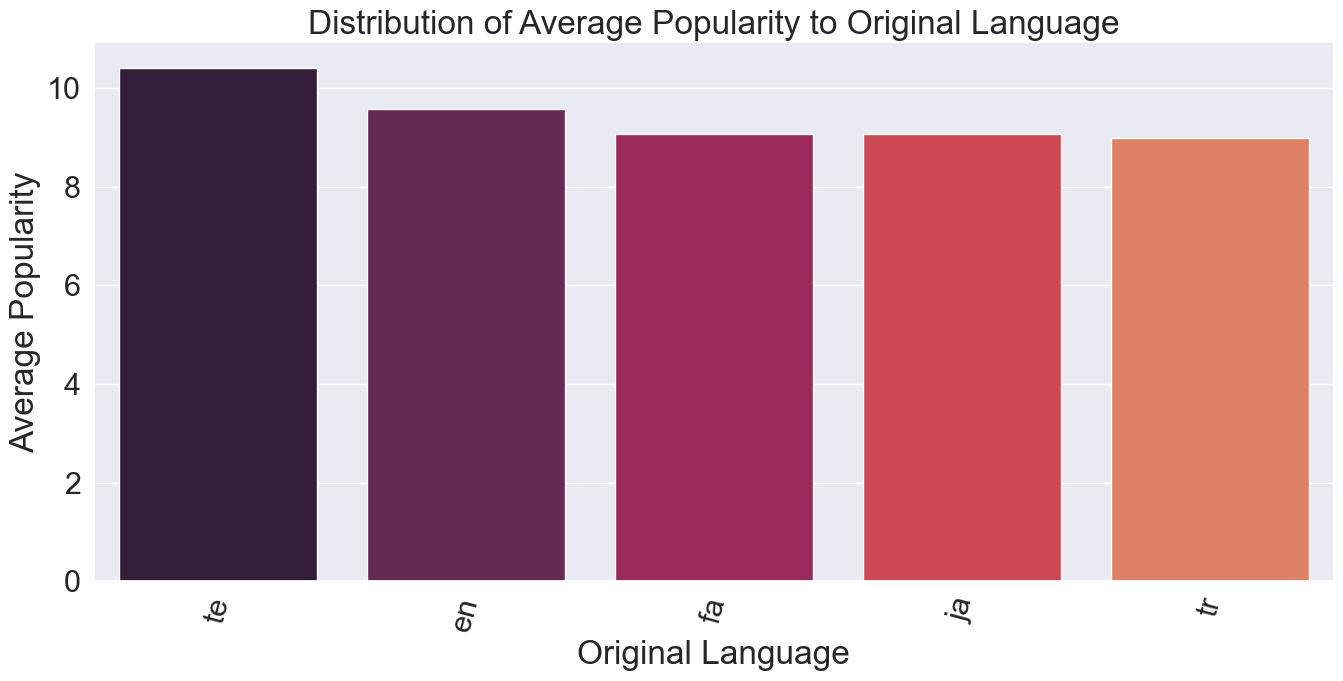

In [60]:
#A Seaborn barplot providing the top 5 most popular languages in the "lang_bar_df" dataframe
fig, ax = plt.subplots(figsize=(16,7))
sns.barplot(x = lang_bar_df['original_language'], y = lang_bar_df['popularity'])
fig.subplots_adjust(hspace=0.125, wspace=0.125)
ax.tick_params(axis='x', rotation=75)
ax.set_xlabel('Original Language')
ax.set_ylabel('Average Popularity')
ax.set_title('Distribution of Average Popularity to Original Language');

In [61]:
# Creating another dataframe called "subset_300m" from the "fm" datafram that only includes rows where the worldwide gross is greater than $300 million
subset_300m = fm.loc[fm['worldwide_gross'] >= 300000000]
# Finding the unique values of the "studio" column from the "subset_300m" dataframe
subset_300m['studio'].unique()

array(['P/DW', 'Par.', 'WB', 'BV', 'Uni.', 'Sum.', 'Fox', 'Wein.', 'FoxS',
       'Sony', 'SGem', 'WB (NL)', 'LGF', 'LG/S', 'FR', 'FUN', 'UTV',
       'WGUSA'], dtype=object)

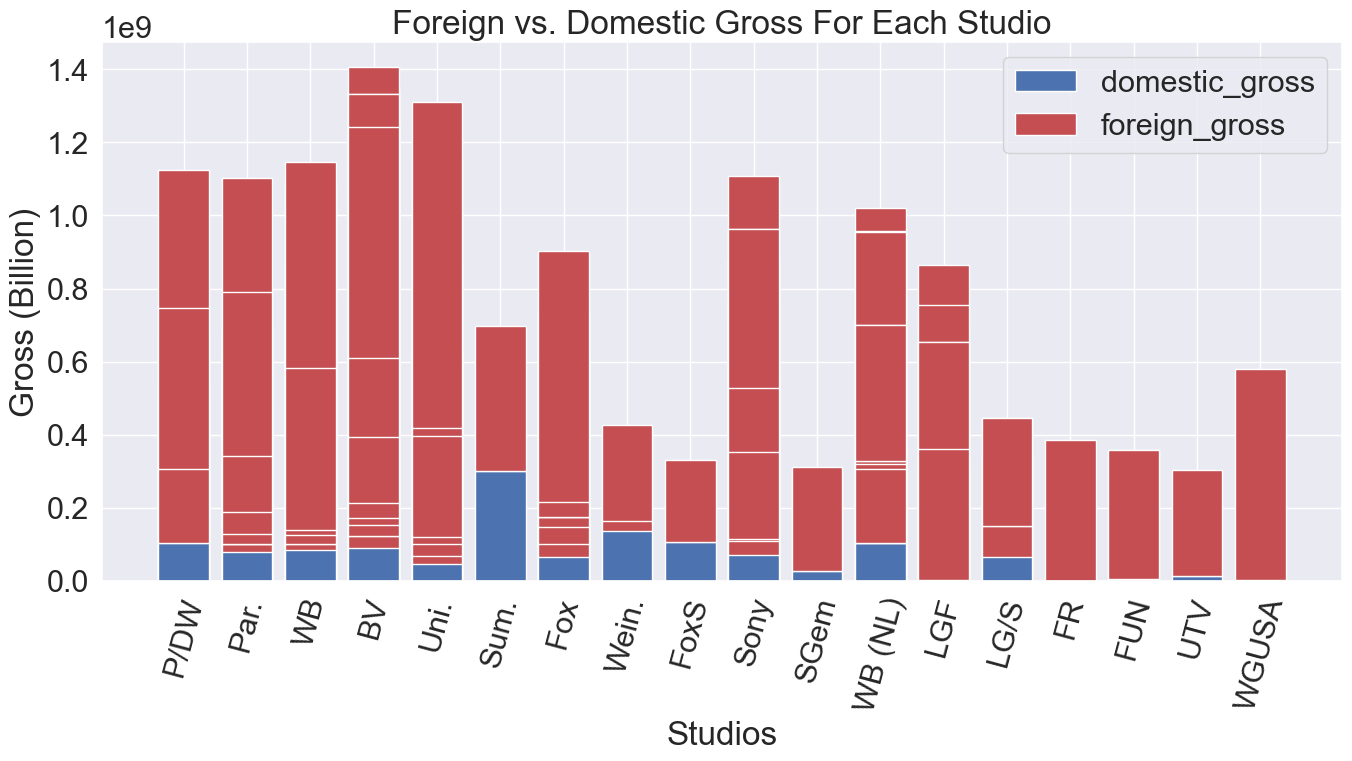

In [62]:
# Creating a Matplotlib barplot comparing the gross of each movie studio and splitting it by domestic/foreign gross from the "subset_300m" dataframe
fig, ax = plt.subplots(figsize=(16,7))
ax.bar(x = subset_300m['studio'], height = subset_300m['domestic_gross'], label='domestic_gross', color='b')
ax.bar(x = subset_300m['studio'], height = subset_300m['foreign_gross'], label='foreign_gross', color='r', bottom = subset_300m['domestic_gross'])
ax.legend()
ax.tick_params(axis='x', rotation=75)
ax.set_xlabel('Studios')
ax.set_ylabel('Gross (Billion)')
ax.set_title('Foreign vs. Domestic Gross For Each Studio');

In [63]:
# Creating a variable "st" that is getting the column "studio" from the "subset_300m" dataframe
st = subset_300m['studio']

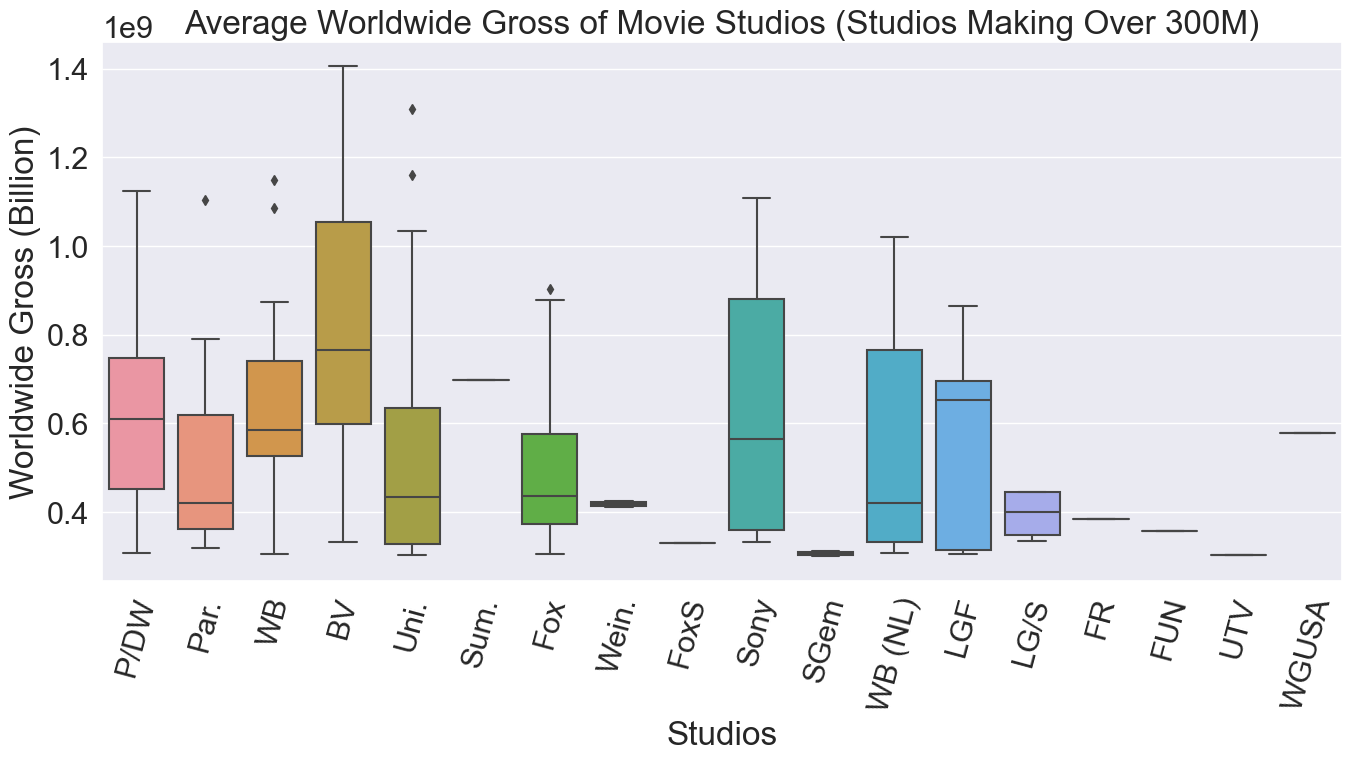

In [64]:
# A Seaborn boxplot comparing the movie studios and the worldwide gross
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(x = st, y = subset_300m['worldwide_gross'])
sns.set(font_scale=2)
ax.tick_params(axis='x', rotation=75)
ax.set_xlabel('Studios')
ax.set_ylabel('Worldwide Gross (Billion)')
ax.set_title('Average Worldwide Gross of Movie Studios (Studios Making Over 300M)');

In [65]:
tn['release_date'] = pd.to_datetime(tn['release_date']).dt.year  # Getting the YEAR from release_date
tn['release_date'] = pd.to_numeric(tn['release_date'])           # Converting to numeric
tn = tn[tn['release_date'] > 1999]                               # Years above 1999

# Cleaning worldwide gross column 
                                                                 # Replacing symbols then to_numeric
tn['worldwide_gross'] = pd.to_numeric(tn['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')
tn['worldwide_gross'] = tn['worldwide_gross'] * 1                # All numbers to positive
tn = tn[(tn['worldwide_gross'] > 100000000) & (tn['worldwide_gross'] < 2000000000)]
                                                                # All worldwide_gross greater than 30000000

# Cleaning production budget column 
                                                                 # Replacing symbols then to_numeric
tn['production_budget'] = pd.to_numeric(tn['production_budget'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')
tn['production_budget'] = tn['production_budget'] * 1            # All numbers to positive
tn = tn[tn['production_budget'] > 0]                             # All production_budget greater than 0

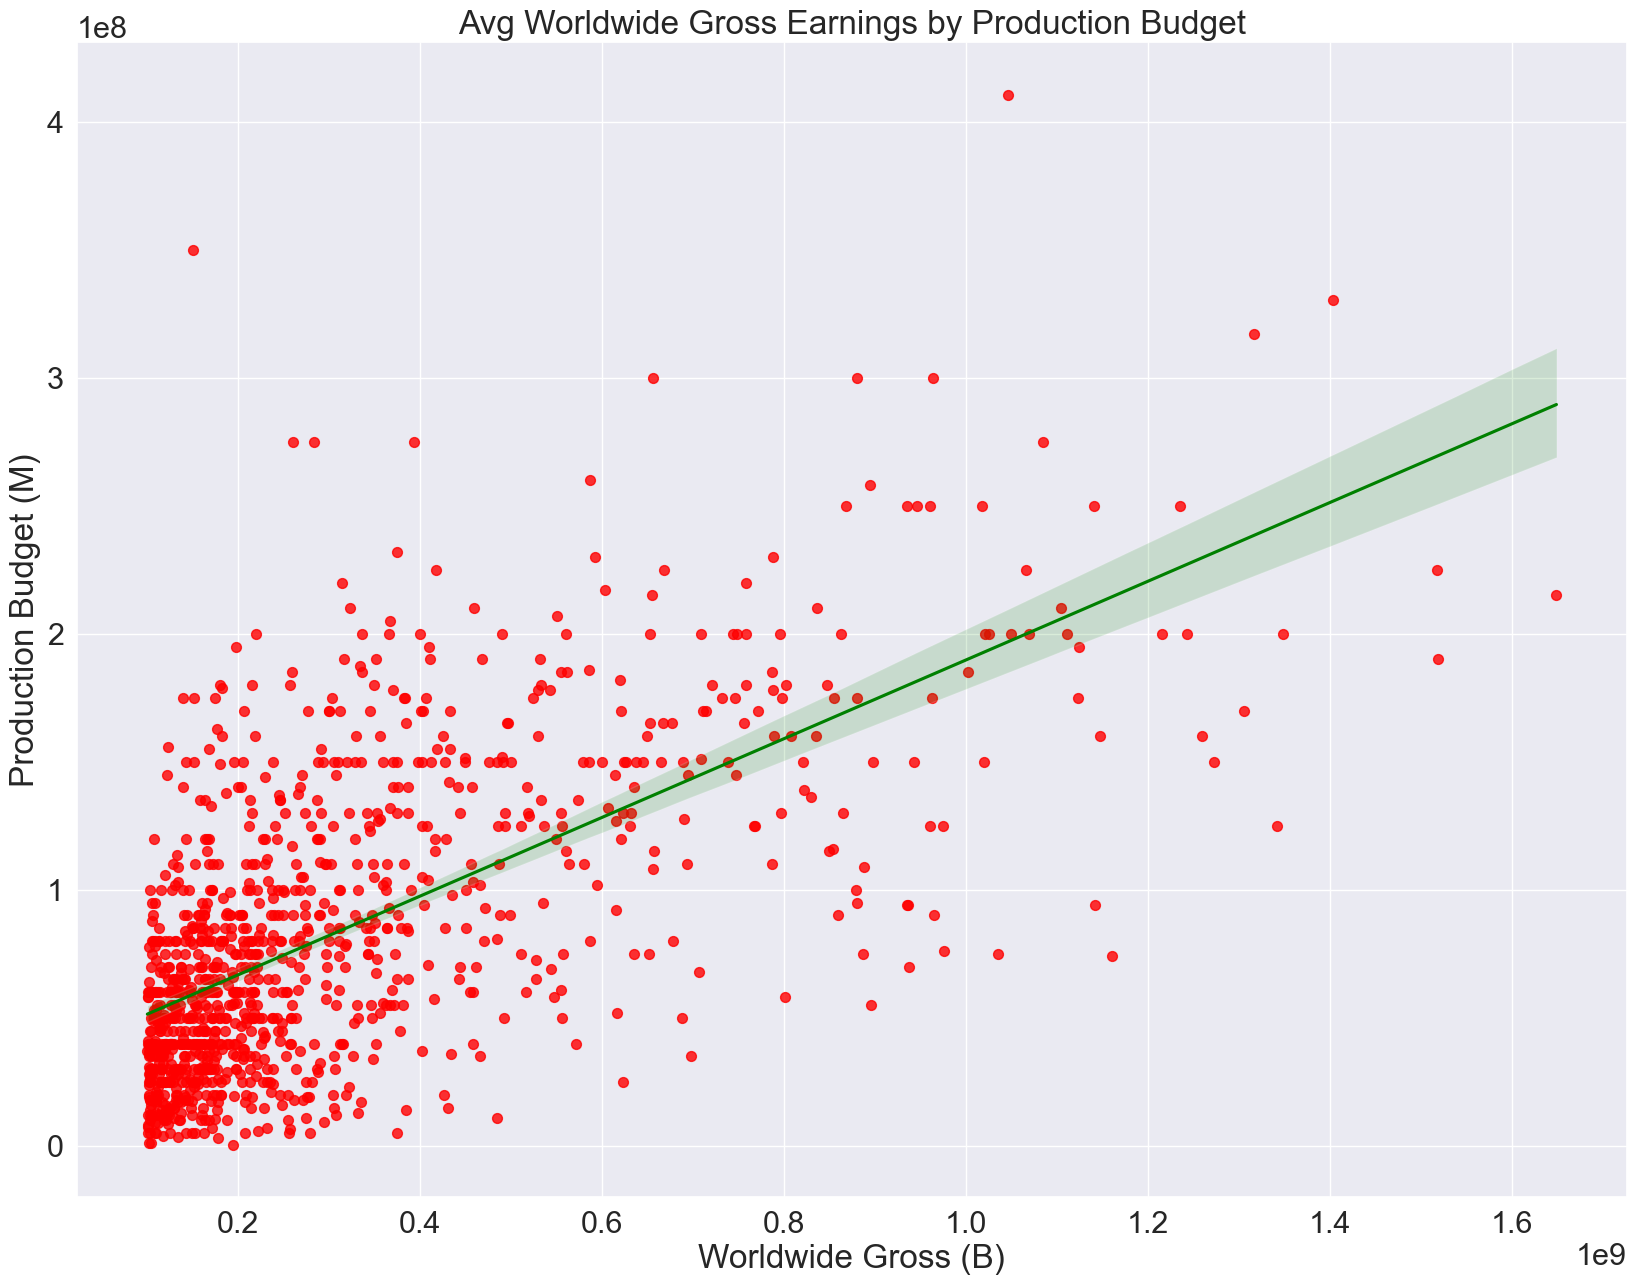

In [66]:
# production_budget / worldwide_gross correlation plot

fig, ax = plt.subplots(figsize=(20,15))
sns.regplot(x = tn['worldwide_gross'], y = tn['production_budget'], scatter=True, color="red", ci=95, scatter_kws={'s':50}, line_kws={'color':'green'})
sns.set(font_scale=2)

ax.set_xlabel("Worldwide Gross (B)")
ax.set_ylabel("Production Budget (M)")
ax.set_title("Avg Worldwide Gross Earnings by Production Budget")

plt.show()

In [67]:
#
tn_copy['release_date'] = pd.to_datetime(tn_copy['release_date'])
tn_copy['month'] = tn_copy['release_date'].dt.month
tn_copy['worldwide_gross'] = tn_copy['worldwide_gross'].apply(lambda x: int(x.replace('$','').replace(',','')))
monthly_gross = tn_copy.groupby('month')['worldwide_gross'].sum()

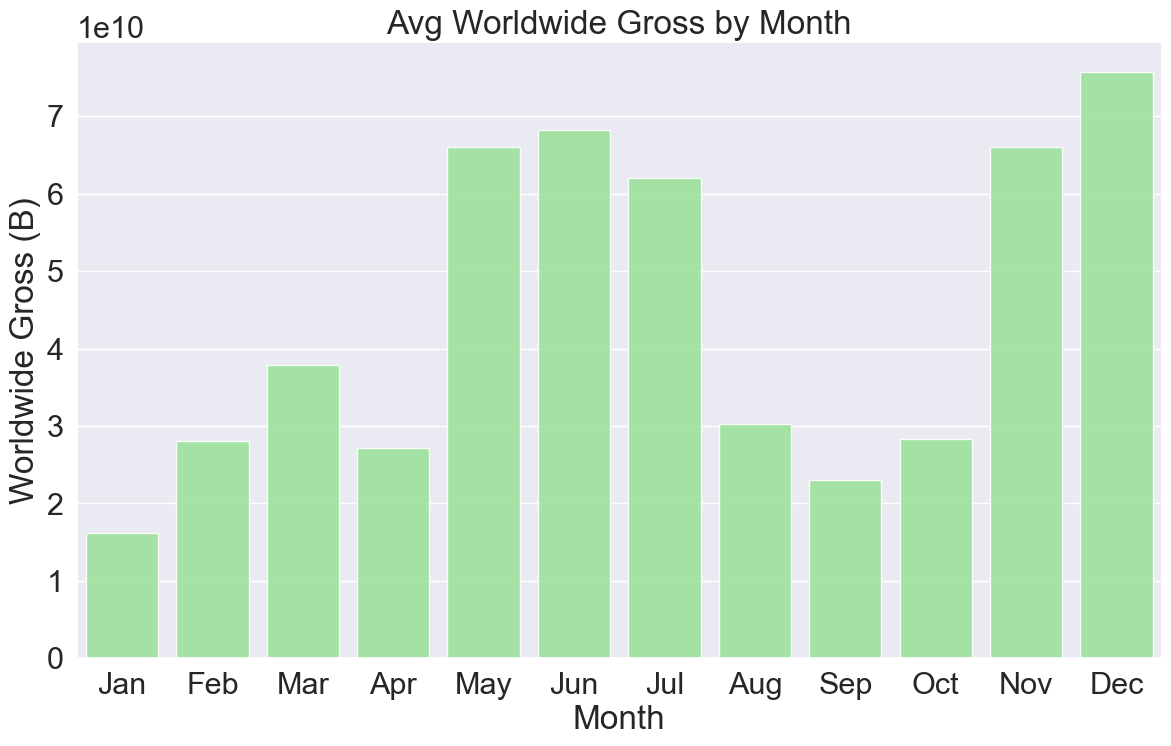

In [68]:
import calendar

x = [calendar.month_abbr[i] for i in monthly_gross.index]
y = monthly_gross.values

fig, ax = plt.subplots(figsize=(14,8))
sns.barplot(x, y, color="lightgreen", alpha= 0.9)
ax.set_xlabel("Month")
ax.set_ylabel("Worldwide Gross (B)")
ax.set_title("Avg Worldwide Gross by Month")
plt.show()

In [69]:
# Inner merging the "imbd_principals" and "imdb_persons" with the column "person_id"
merged_imdb_people = pd.merge(imdb_principals, imdb_persons, how="inner", on='person_id')

In [70]:
akas_ratings_imdb = pd.merge(imdb_movie_akas, imdb_movie_ratings, how="inner", on='movie_id')
merged_imdb = pd.merge(akas_ratings_imdb, imdb_movie_basics, how="inner", on='movie_id')

In [71]:
genres = merged_imdb["genres"].str.split(",").explode().unique()
genres

array(['Action', 'Adventure', 'Sci-Fi', 'Drama', 'Documentary', 'Romance',
       'Family', 'Fantasy', 'Crime', 'Thriller', 'Comedy', 'Mystery',
       'Musical', 'Animation', 'Horror', 'Sport', 'Music', 'History',
       'Biography', None, 'War', 'News', 'Western', 'Reality-TV',
       'Game-Show', 'Adult'], dtype=object)

In [72]:
rating_genre = merged_imdb[merged_imdb['genres'].isin(genres)].groupby("genres")["averagerating"].mean().sort_values()

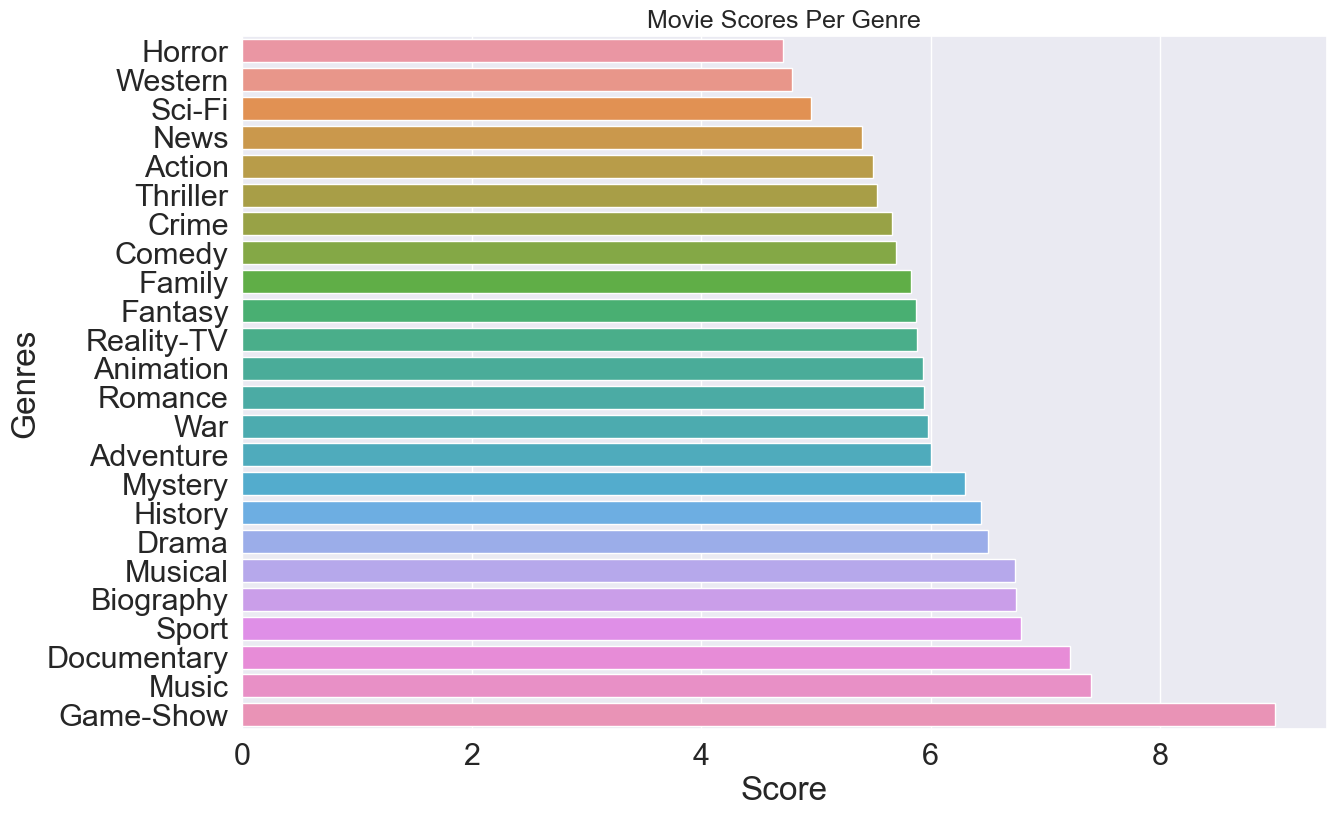

In [73]:
x = rating_genre.values
y = rating_genre.index

fig, ax = plt.subplots(figsize=(14,9))
sns.set(font_scale=1.5)
sns.set_palette("rocket")
sns.barplot(x,y)

ax.set_xlabel("Score")
ax.set_ylabel("Genres")

ax.set_title("Movie Scores Per Genre") 
# ax.tick_params(axis='x', rotation=75)
plt.show()

In [74]:
review_rating = pd.merge(rt_rev, rt, how = 'inner', on = 'id')

In [75]:
review_rating['rating_x'].isnull().sum()

13517

In [76]:
filtered_review_rating = review_rating.dropna(subset = ['rating_x'])
filtered_review_rating = review_rating.dropna(subset = ['rating_y'])

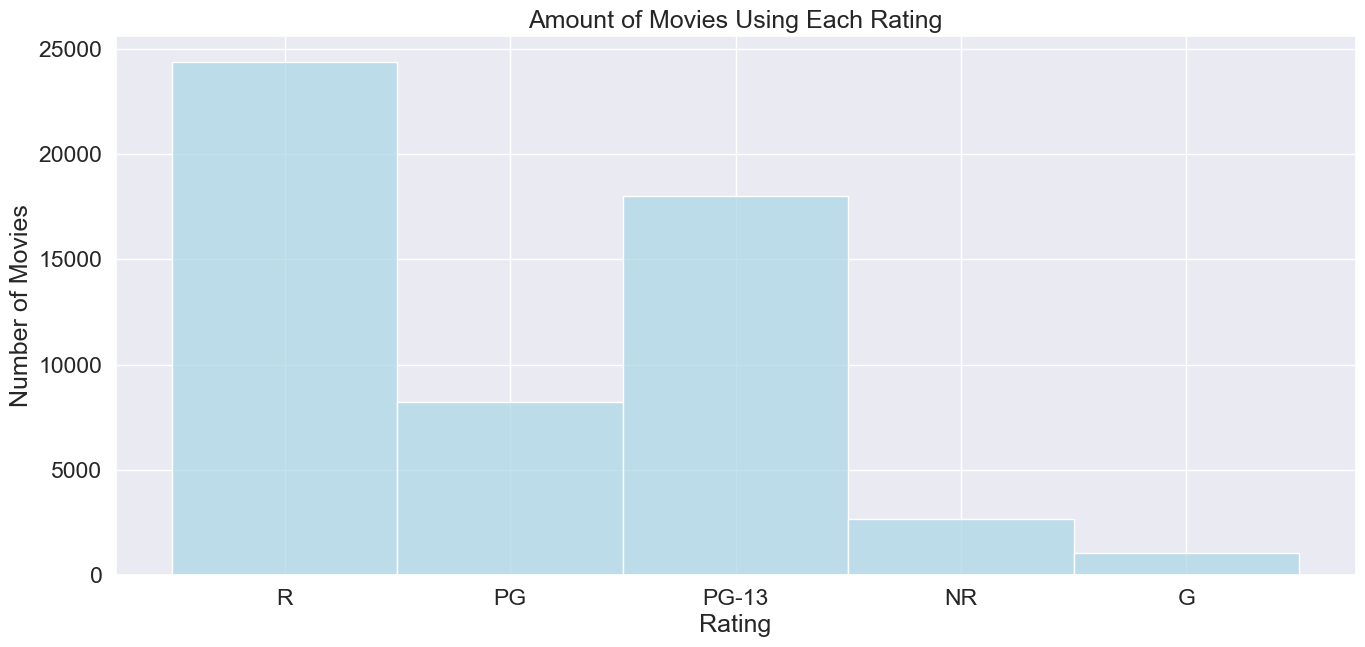

In [77]:
fig, ax = plt.subplots(figsize = (16,7))
sns.histplot(x = filtered_review_rating['rating_y'], color = "lightblue" ) 
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Movies')
ax.set_title('Amount of Movies Using Each Rating');

In [78]:
genre_id = {28:'Action', 12:'Adventure', 16:'Animation', 35:'Comedy', 80:'Crime',
            99:'Documentary', 18:'Drama', 10751:'Family', 14:'Fantasy', 36:'History',
            27:'Horror', 10402:'Music', 9648:'Mystery', 10749:'Romance',
            878:'Science Fiction', 10770:'TV Movie', 53:'Thriller', 10752:'War',
            37:'Western'}

In [79]:
fm['genre_ids'] = fm['genre_ids'].apply(lambda x: x if not pd.isna(x) else None)

In [80]:
import ast

fm_genres = fm[pd.notnull(fm['genre_ids'])]
fm_genres['genre_ids'] = fm_genres['genre_ids'].apply(lambda x: ast.literal_eval(x))
fm_genres['genre'] = fm_genres['genre_ids'].apply(lambda x: [genre_id[g] for g in x])
fm_genres['genre'] = fm_genres['genre'].apply(lambda x: ', '.join(x))

In [81]:
review_rating.dropna(subset = ['genre'], inplace=True)
review_rating['genre'] = review_rating['genre'].apply(lambda x: str(x.replace('|',',').replace('and',',').replace(' , ',',')))

In [82]:
review_rating['year'] = review_rating.date.str.split(",").str[1].tolist()
review_rating.dropna(subset = ['theater_date'], inplace=True)
review_rating["theater_date"] = pd.to_datetime(review_rating["theater_date"], format= '%b %d, %Y').dt.strftime('%Y-%m-%d')

In [83]:
filtered_rating = review_rating.drop_duplicates(subset='synopsis')
filtered_rating = filtered_rating.dropna(subset=['rating_y'])

In [84]:
filtered_rating.rename(columns={'theater_date': 'release_date'}, inplace=True)

In [85]:
rating_lang = pd.merge(fm_genres, filtered_rating, how="inner", on=['genre', 'release_date'])

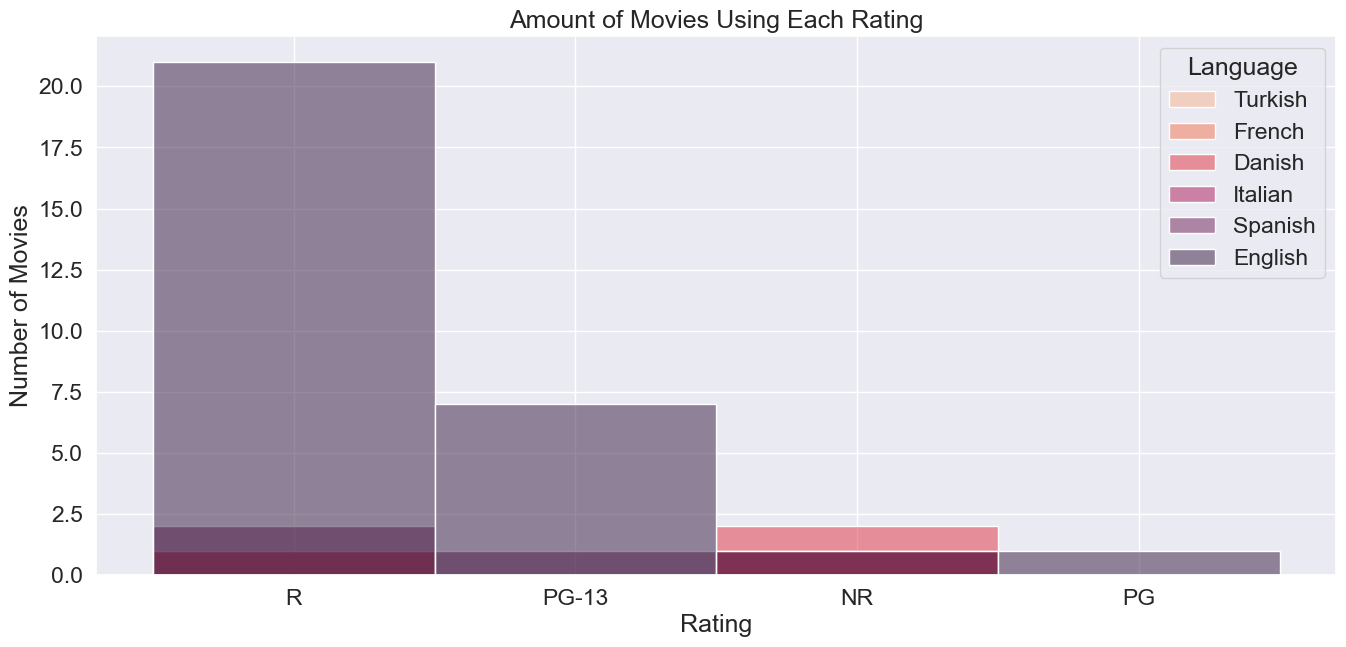

In [86]:
fig, ax = plt.subplots(figsize = (16,7))
sns.histplot(x = rating_lang['rating_y'], hue = rating_lang['original_language'])
plt.legend(title='Language', loc = 'upper right', labels=['Turkish', 'French', 'Danish', 'Italian', 'Spanish', 'English'])
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Movies')
ax.set_title('Amount of Movies Using Each Rating');

In [87]:
filtered_fm_genres = fm_genres.drop_duplicates(subset='title')

In [88]:
del merged_imdb["title"]
filtered_imdb = merged_imdb.drop_duplicates(subset='original_title')
filtered_imdb.rename(columns = {'original_title': 'title'}, inplace=True)

In [89]:
fm_genres_imdb = pd.merge(fm_genres, filtered_imdb, how="inner", on=['title'])

In [90]:
all_genres = fm_genres_imdb["genres"].str.split(",").explode().unique()
all_genres

array(['Action', 'Adventure', 'Animation', 'Sci-Fi', 'Comedy', 'Family',
       'Thriller', 'Drama', 'Fantasy', 'Mystery', 'Biography', 'History',
       'Romance', 'Crime', 'Horror', 'Western', 'War', 'Sport',
       'Documentary', 'Music', 'Musical', 'News'], dtype=object)

In [91]:
genre_gross = fm_genres_imdb[fm_genres_imdb['genres'].isin(all_genres)].groupby("genres")["worldwide_gross", "runtime_minutes"].mean().sort_values(by=['worldwide_gross', 'runtime_minutes'])
genre_gross.dropna(inplace=True)

genre_gross["runtime_minutes"] = genre_gross["runtime_minutes"].round(1)
genre_gross["worldwide_gross"] = genre_gross["worldwide_gross"].round()
genre_gross

,worldwide_gross,runtime_minutes
genres,,
Fantasy,1546000.0,81.0
Documentary,12233091.0,87.4
Drama,18332187.0,106.0
Action,38267936.0,112.1
Thriller,38499236.0,90.7
Crime,65469367.0,112.3
Comedy,68172363.0,97.7
Horror,79385458.0,88.8
Animation,271951099.0,86.0


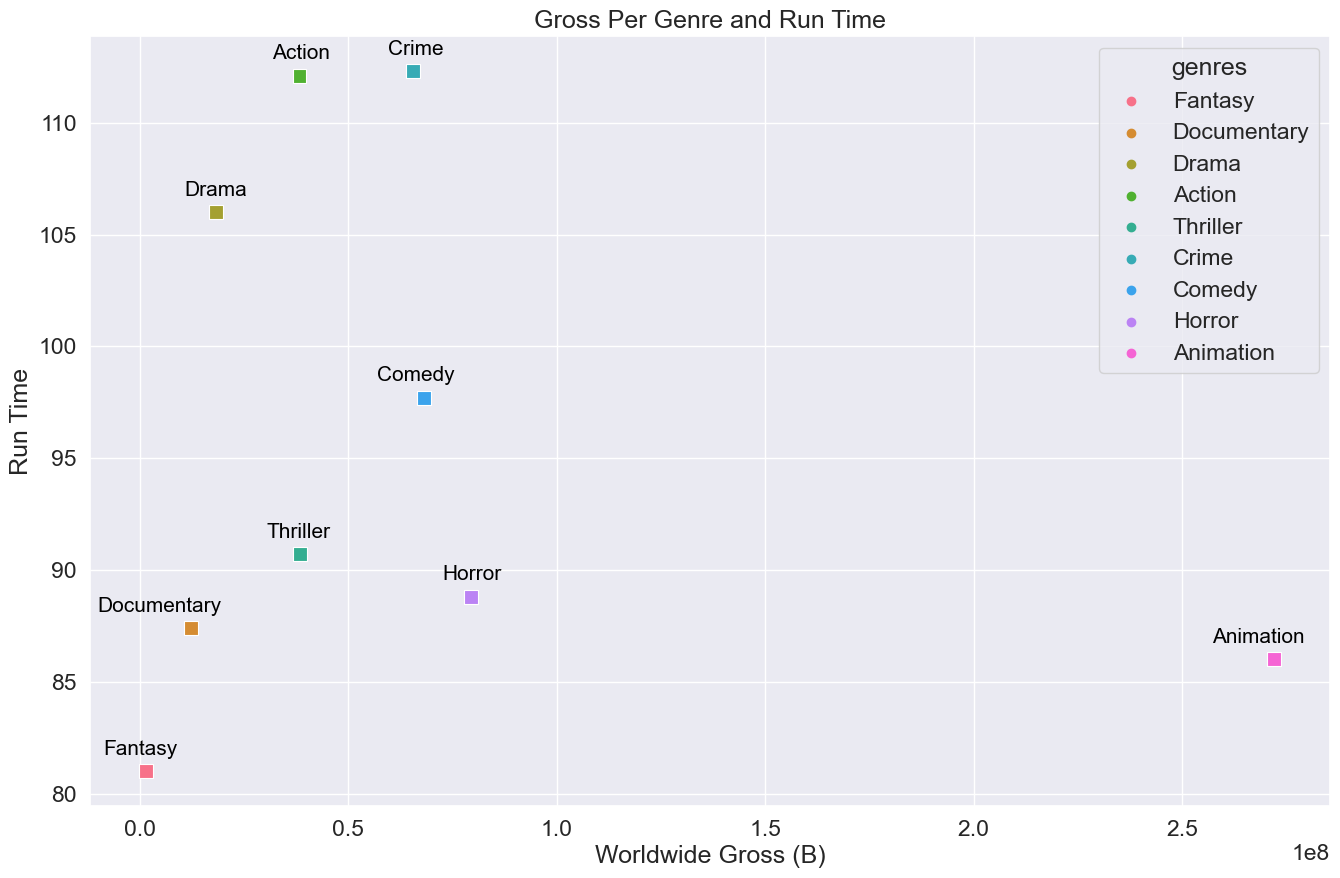

In [92]:
x1 = genre_gross["worldwide_gross"]
y2 = genre_gross["runtime_minutes"]

fig, ax = plt.subplots(figsize=(16,10))
sns.set(font_scale=1.5)
sns.set_palette("rocket")
sns.scatterplot(x=x1, y=y2, hue=genre_gross.index,  marker='s', color='red', s=100)

ax.set_xlabel("Worldwide Gross (B)")
ax.set_ylabel("Run Time")
ax.set_title("Gross Per Genre and Run Time")

for genre in genre_gross.index:
    genre_abbr = genre
    x = genre_gross.loc[genre, "worldwide_gross"]
    y = genre_gross.loc[genre, "runtime_minutes"]
    ax.annotate(genre_abbr, xy=(x, y), xytext=(22, 12), textcoords='offset points', ha='right', fontsize=15, color='black')

plt.show()

In [93]:
rating = rt.dropna(axis=0, subset=['theater_date'])

In [94]:
rating['runtime'] = rating['runtime'].apply(lambda x: int(x.replace('minutes',''))if isinstance(x, str) else x)

In [95]:
mean_runtime = rating['runtime'].mean()

In [96]:
rating['runtime'].fillna(value=mean_runtime, inplace=True)
subset_2000 = rating[rating.theater_date.str[-4:].astype(int)>=2010]
year = subset_2000.theater_date.str.split(",").str[1].tolist()
year = [int(i) for i in year]

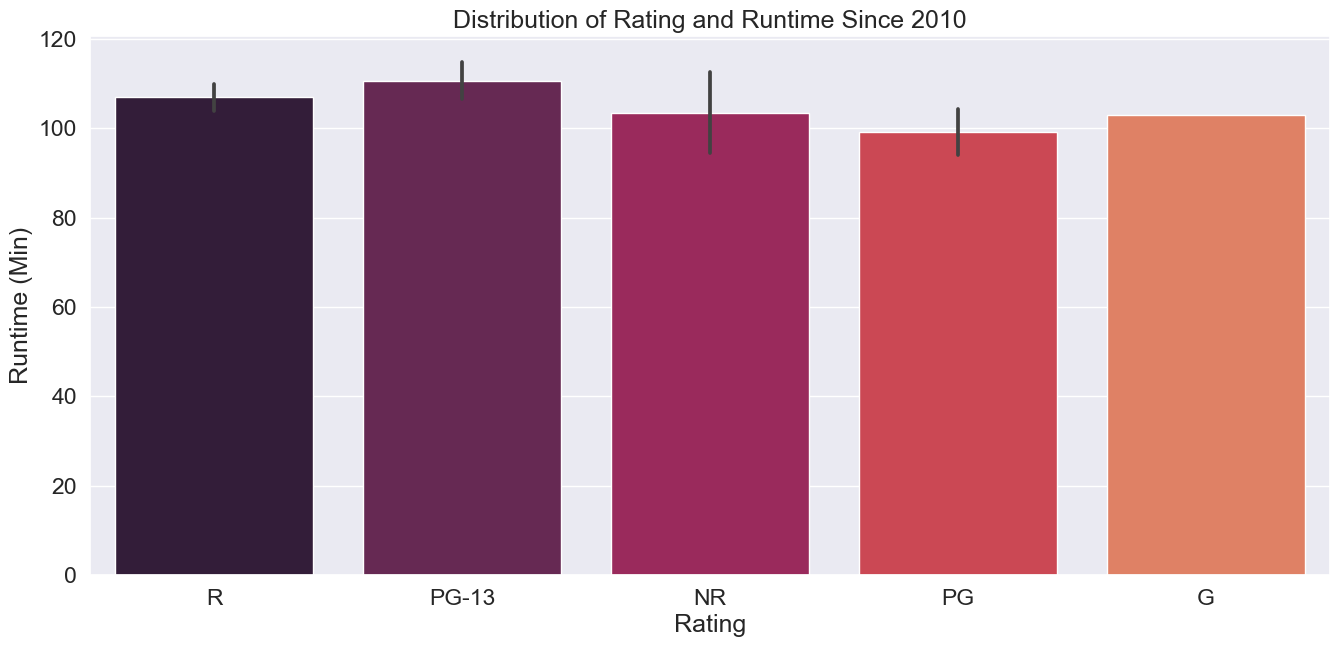

In [97]:
fig, ax = plt.subplots(figsize=(16,7))
sns.barplot(x = subset_2000['rating'], y = subset_2000['runtime'])
ax.set_xlabel('Rating')
ax.set_ylabel('Runtime (Min)')
ax.set_title('Distribution of Rating and Runtime Since 2010');

In [98]:
run_rate = pd.merge(imdb_movie_basics, imdb_movie_ratings, how = 'inner', on = 'movie_id')

In [99]:
run_rate.sort_values(by=['runtime_minutes'], ascending=False)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
70280,tt8273150,Logistics,Logistics,2012,51420.0,Documentary,5.0,17
27683,tt2659636,Modern Times Forever,Modern Times Forever,2011,14400.0,Documentary,6.2,69
15171,tt2008009,The Clock,The Clock,2010,1440.0,Drama,8.9,219
71441,tt8677246,Bullfighting Memories,Bullfighting Memories,2017,1100.0,"Comedy,History",8.6,5
72424,tt9047474,La flor,La flor,2018,808.0,"Drama,Fantasy,Musical",8.5,100
...,...,...,...,...,...,...,...,...
73828,tt9899290,Band Together with Logic,Band Together with Logic,2019,NaN,Documentary,8.7,10
73830,tt9899850,The Agitation,Ashoftegi,2019,NaN,"Drama,Thriller",4.9,14
73844,tt9905796,July Kaatril,July Kaatril,2019,NaN,Romance,9.0,5
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8


In [100]:
mean_run = run_rate['runtime_minutes'].mean()

In [101]:
run_rate['runtime_minutes'].fillna(value=mean_run, inplace=True)

In [102]:
subset_run = run_rate.loc[run_rate['runtime_minutes'] < 200]
subset_run

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00000,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00000,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00000,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,94.65404,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00000,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.00000,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.00000,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,94.65404,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,94.65404,None,6.6,5


In [103]:
runt = subset_run['runtime_minutes']
ar = subset_run['averagerating']

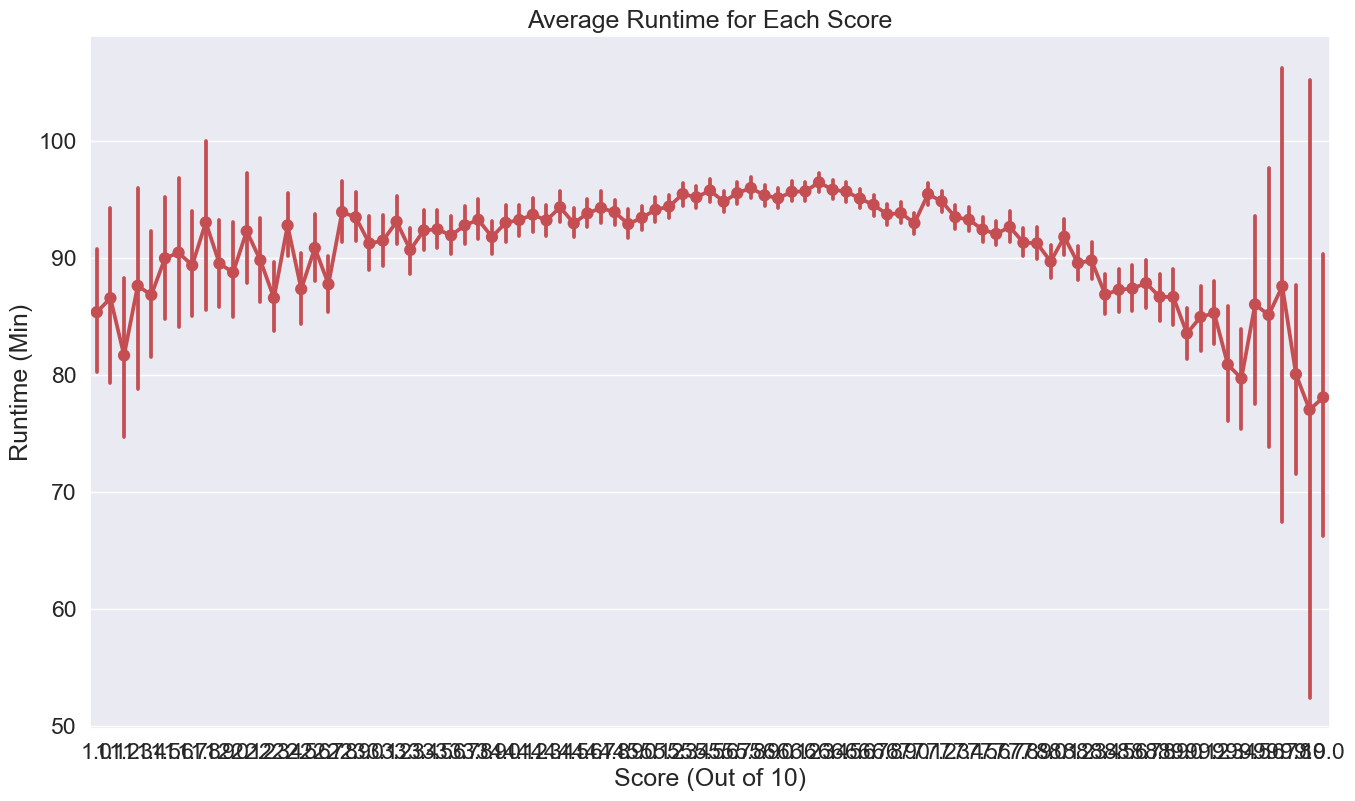

In [104]:
fig, ax = plt.subplots(figsize=(16,9))
sns.pointplot(x = ar, y = runt, color = 'r')
ax.set_xlabel('Score (Out of 10)')
ax.set_ylabel('Runtime (Min)')
ax.set_title('Average Runtime for Each Score');